<a href="https://colab.research.google.com/github/evmpython/CAT212_2025/blob/main/CAT212_Aula_04_Tempestades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Disciplina:** CAT212 - Microfísica de Nuvens e Eletricidade Atmosférica
---

## 🟢 **Aula Prática 4:** $\underline{Trabalhando\ com\ Dados\ de\ Tempestades}$

---


**OBJETIVO:**
 - Nesta aula prática aprenderemos como analisar dados de tempestades. Para isto utilizaremos os dados obtidos por um programa que rastrea as tempestades utilizando imagens de satélite.

---


**DADOS DE ENTRADA**:

Arquivos texto de tempestades.
- **Tipo do dado:** tabela  
- **Formato do dado:** arquivo TEXTO
- **Nome do arquivo:** 1_ciclo_diurno_2013.txt.zip
- **Fonte dos dados:** Tempestades rastreadas pelo algotitmo Fortracc



---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo JPG
- **Imagens geradas:**
    1. Fig_1_espacial_anual_AS_2017.png
    2. Fig_2_espacial_mensal_AS_Outubro.png
    3. Fig_3_espacial_mensal_MG_Outubro.png
    4. Fig_4_nascimento.jpg
    5. Fig_5_dissipação.jpg
    6. Fig_6_duracao.jpg



---


**PROCEDIMENTO REALIZADO:**
- Os seguintes procedimentos são realizados nesse código:

1.   Instalação das bibliotecas
2.   Importação das biblotecas
3.   Montando o drive
4.   Definindo o caminho do diretório
5.   Escolhendo o ano das tempestades
6.   Plotar mapa das tempestades por ano
7.   Plotar mapa das tempestades por mês
8.   Plotar mapa das tempestades por mês para um estado
9.   Plotar gráfico do horário de nascimento das tempestades
10.  Plotar gráfico do horário de dissipação das tempestades
11.  Plotar gráfico da duração das tempestades

---

**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu drive.  
2. Vocês deverão escolher o `ano` das tempestades.

---
**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 11/04/2025


---




# **1° Passo:** Instalando as bibliotecas

In [ ]:
# saber as bibliotecas que vem instaladas por padrão no Google Colab
!pip list
!pip freeze > requirements.txt

In [5]:
!pip install -q ultraplot cartopy salem

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.1 MB/s eta 0:00:00


# **2° Passo:** Importando Bibliotecas

In [8]:
import numpy as np                                       # Biblioteca para trabalhar com matrizes
import pandas as pd                                      # Biblioteca para trabalhar com tabelas (parecidas com tabelas em excel)
import ultraplot as uplt                                 # Biblioteca para gerar figuras
import os                                                # Biblioteca para acessar o sistema operacional
import cartopy.crs as ccrs                               # Biblioteca para trabalhar com projeções de mapas
import cartopy.io.shapereader as shpreader               # Biblioteca para ler arquivos shapefiles
import salem                                             # Biblioteca para ler arquivos shapefiles
import time                                              # Biblioteca de contagem de tempo
from shapely.geometry import Point, Polygon, LineString  # Biblioteca para extrair os pontos de um geometria
import geopandas as gpd                                  # Biblioteca para trabalhar com shapefiles

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

# **3° Passo:** Montando drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**


- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [10]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT212 - MICROFÍSICA DE NUVENS E ELETRICIDADE ATMOSFÉRICA/AULAS/CAT212 - PYTHON PARA MICROFISICA DE NUVENS/AULA_04_TEMPESTADES'

- Criando a pasta de saída (`output`)

In [11]:
os.makedirs(f'{dir}output/', exist_ok=True)

# **PARTE 1:** Escolha o ano das tempestades

Os dados que iremos utilizar estão disponibilizados no [github](https://github.com/evmpython/CAT212_2025/tree/main/input) da nossa disciplina. São dados de tempestades para os seguintes anos: 2013, 2014, 2015, 2016 e 2017.
Então o primeiro passo será escolher o ano das tempestades.

In [27]:
ano = '2017'

# **PARTE 2:** Conhecendo os dados de tempestades

**Lendo o arquivo: `read_csv()`**
* Iremos ler os arquivos CSV diretamente do github da disciplina utilizando a biblioteca pandas.
* Lendo a tabela com o comando **read_csv**. A tabela fica armazenada na variável **df** (df=DataFrame, significa tabela em português). Mas podemos colocar o nome que quisermos. Por exemplo: tabela, dados, tempestades e etc.
* Vejam como é simples. Com apenas **1 linha** fizemos a leitura do arquivo. Essa é a **facilidade do Python** :)

In [28]:
df = pd.read_csv(f'https://github.com/evmpython/CAT212_2025/raw/refs/heads/main/input/1_ciclo_diurno_{ano}.zip', sep='\s+')

**Visualizando os dados da tabela: `display()`**

In [29]:
display(df)

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**Exibindo uma coluna em específico da tabela df**

In [30]:
df['DURACAO']

,DURACAO
0,0.5
1,0.5
2,1.0
3,0.5
4,0.5
...,...
92091,0.5
92092,0.5
92093,0.5
92094,0.5


In [31]:
df['ANO_I']

,ANO_I
0,2017.0
1,2017.0
2,2017.0
3,2017.0
4,2017.0
...,...
92091,2017.0
92092,2017.0
92093,2017.0
92094,2017.0


**Mostrando a quantidade de linhas e colunas da tabela: `shape`**

Descobrindo a quantidade de linhas da tabela

In [32]:
df.shape[0]

92096

Descobrindo a quantidade de colunas da tabela

In [33]:
df.shape[1]

18

# **PARTE 3:** Plotando mapa da **localização** das tempestades por **ano**

In [34]:
df

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**verificando o tipo dos dados**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92096 entries, 0 to 92095
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ANO_I    92096 non-null  float64
 1   MES_I    92096 non-null  float64
 2   DIA_I    92096 non-null  float64
 3   HOR_I    92096 non-null  float64
 4   MIN_I    92096 non-null  float64
 5   ANO_F    92096 non-null  float64
 6   MES_F    92096 non-null  float64
 7   DIA_F    92096 non-null  float64
 8   HOR_F    92096 non-null  float64
 9   MIN_F    92096 non-null  float64
 10  DURACAO  92096 non-null  float64
 11  IN       92096 non-null  int64  
 12  -CG      92096 non-null  int64  
 13  +CG      92096 non-null  int64  
 14  LATI     92096 non-null  float64
 15  LONI     92096 non-null  object 
 16  LATF     92096 non-null  float64
 17  LONF     92096 non-null  float64
dtypes: float64(14), int64(3), object(1)
memory usage: 12.6+ MB


**transformando o tipo dos dados para numérico**
 - a coluna **LONI** esta como caracter. Então precisaremos transformá-la para numérico.

In [36]:
df = df.apply(pd.to_numeric, errors='coerce')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92096 entries, 0 to 92095
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ANO_I    92096 non-null  float64
 1   MES_I    92096 non-null  float64
 2   DIA_I    92096 non-null  float64
 3   HOR_I    92096 non-null  float64
 4   MIN_I    92096 non-null  float64
 5   ANO_F    92096 non-null  float64
 6   MES_F    92096 non-null  float64
 7   DIA_F    92096 non-null  float64
 8   HOR_F    92096 non-null  float64
 9   MIN_F    92096 non-null  float64
 10  DURACAO  92096 non-null  float64
 11  IN       92096 non-null  int64  
 12  -CG      92096 non-null  int64  
 13  +CG      92096 non-null  int64  
 14  LATI     92096 non-null  float64
 15  LONI     92094 non-null  float64
 16  LATF     92096 non-null  float64
 17  LONF     92096 non-null  float64
dtypes: float64(15), int64(3)
memory usage: 12.6 MB


**Gerando a Figura:**
-  Para isto utilizaremos as variáveis `LATI` e `LONI`

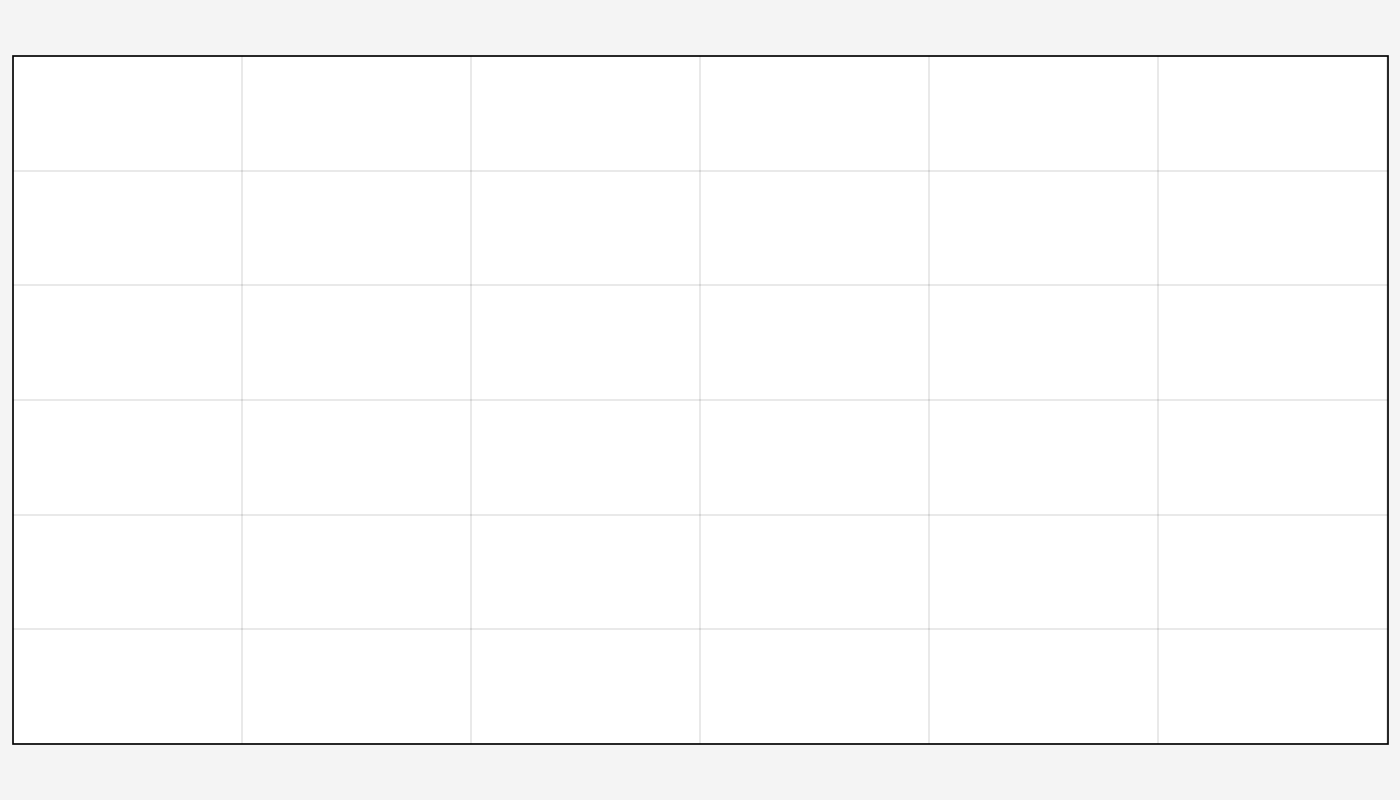

In [38]:
# moldura da figura
fig, ax = uplt.subplots(figsize=(7, 4), tight=True, proj='pcarree')

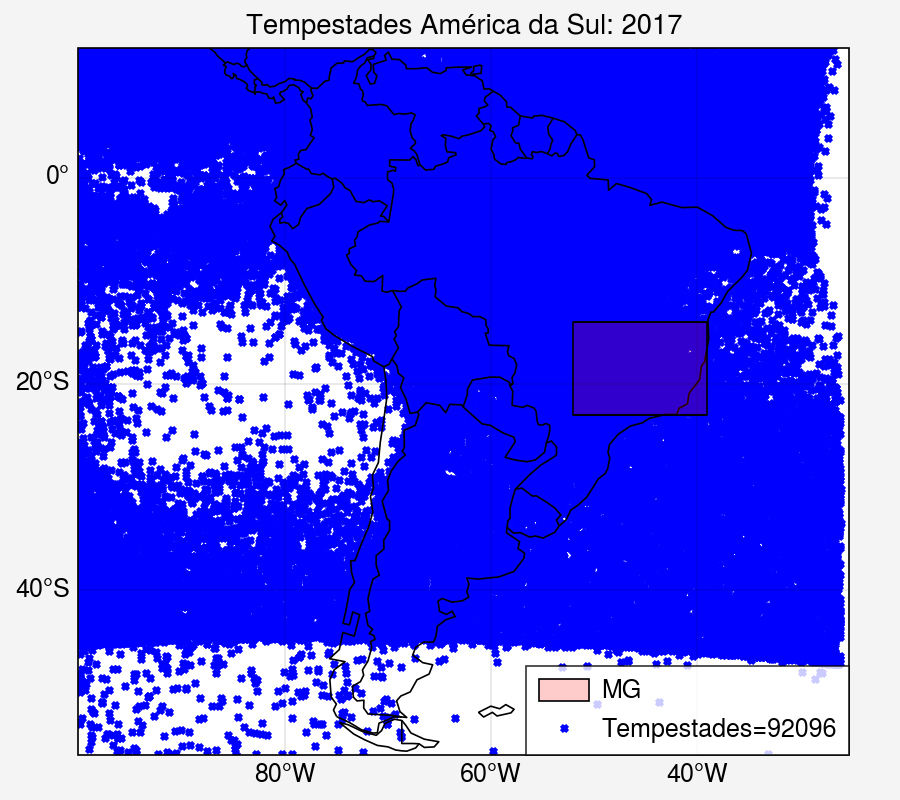

CPU times: user 8.79 s, sys: 387 ms, total: 9.17 s
Wall time: 9.22 s


In [40]:
%%time
# moldura da figura
fig, ax = uplt.subplots(figsize=(4.5,4), tight=True, proj='pcarree')

# fomatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(-56.00, 12.52), lonlim=(-100., -25.24),
          title=f'Tempestades América da Sul: {ano}')

# plota quadrado da região de estudo
ax.fill_between((-52., -39.), *(-23., -14.), zorder=3, edgecolor='black', facecolor=uplt.set_alpha('red', 0.2), label='MG')

# plota localização das tempestades
ax.scatter(df['LONI'].values, df['LATI'].values, transform=ccrs.PlateCarree(), marker='x', s=5, color='blue', label=f'Tempestades={str(df.shape[0])}')

# adiciona legenda
ax.legend(ncol=1)

# salva figura
fig.save(f'{dir}/output/Fig_1_espacial_anual_AS_{str(ano)}.png', bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 4:** Plotando mapa da **localização** das tempestades por **mês**

In [41]:
df

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**Selecionando o mês**

In [46]:
# mês escolhido
mes = 10.0

# nome por extenso dos meses
nome_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
              'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

Vejam que a nova tabela gerada (isto é, a **df2**) possui apenas os dados do mês escolhido.

In [47]:
# mostrando a coluna mês
df['MES_I']

,MES_I
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
92091,12.0
92092,12.0
92093,12.0
92094,12.0


In [48]:
df2 = df[ df['MES_I'] == mes] # lembre-se que mês tem o valor de "10"
df2

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
64232,2017.0,10.0,1.0,0.0,0.0,2017.0,10.0,1.0,1.0,30.0,1.5,0,0,0,7.80,-95.80,7.72,-95.76
64233,2017.0,10.0,1.0,0.0,0.0,2017.0,10.0,1.0,0.0,30.0,0.5,0,0,0,7.00,-91.40,6.92,-91.36
64234,2017.0,10.0,1.0,0.0,0.0,2017.0,10.0,1.0,2.0,30.0,2.5,0,0,0,6.80,-90.76,6.60,-90.64
64235,2017.0,10.0,1.0,0.0,0.0,2017.0,10.0,1.0,0.0,30.0,0.5,0,0,0,5.52,-90.80,5.24,-90.92
64236,2017.0,10.0,1.0,0.0,0.0,2017.0,10.0,1.0,0.0,30.0,0.5,0,0,0,6.96,-88.08,6.92,-88.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72742,2017.0,10.0,31.0,23.0,0.0,2017.0,10.0,31.0,23.0,30.0,0.5,0,0,0,8.72,-83.04,8.72,-83.20
72743,2017.0,10.0,31.0,23.0,0.0,2017.0,10.0,31.0,23.0,30.0,0.5,1,19,2,11.16,-73.96,11.12,-74.12
72744,2017.0,10.0,31.0,23.0,0.0,2017.0,10.0,31.0,23.0,30.0,0.5,0,0,1,-8.84,-65.88,-8.84,-65.96
72745,2017.0,10.0,31.0,23.0,0.0,2017.0,10.0,31.0,23.0,30.0,0.5,1,2,7,-1.68,-58.08,-1.64,-58.12


**Gerando a figura**

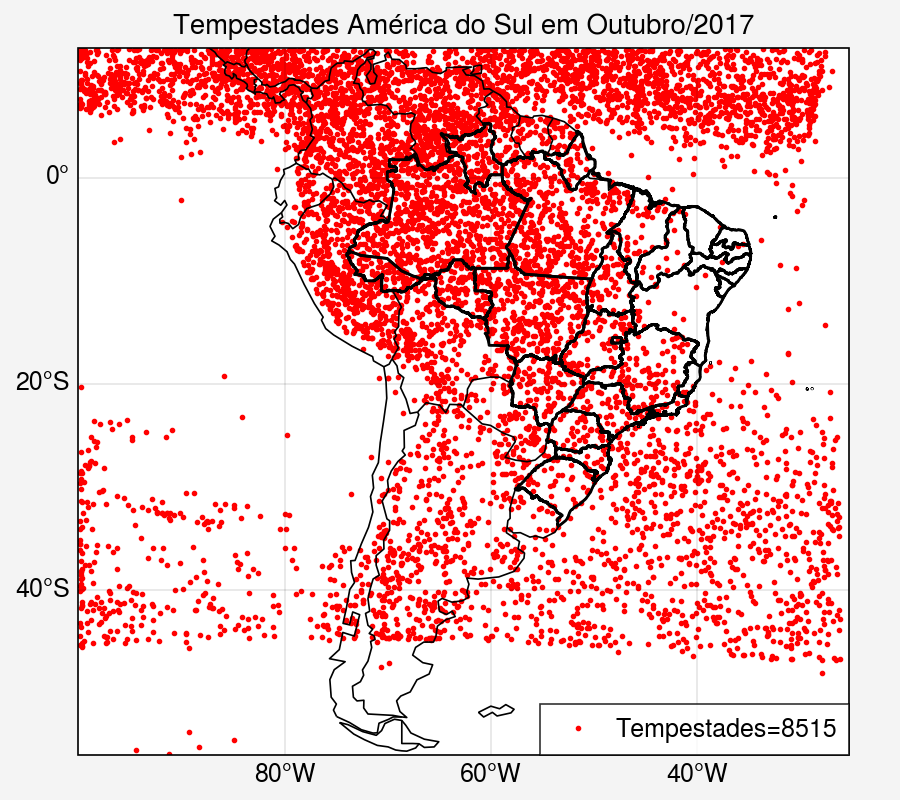

In [49]:
# moldura da figura
fig, ax = uplt.subplots(figsize=(4.5,4), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(-56.00, 12.52), lonlim=(-100., -25.24),
          title=f'Tempestades América do Sul em {nome_meses[int(mes-1)]}/{ano}')

# plota localização das tempestades
ax.scatter(df2['LONI'].values, df2['LATI'].values, transform=ccrs.PlateCarree(), marker='o', s=2, color='red', label=f'Tempestades={str(df2.shape[0])}')

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# adiciona legenda
ax.legend(ncol=1)

# salva figura
fig.save(f'{dir}/output/Fig_2_espacial_mensal_AS_{nome_meses[int(mes-1)]}.png')

# exibe na tela
uplt.show()

# **PARTE 5:** Plotando mapa da **localização** das tempestades de um mês para um determinado Estado

In [54]:
# define o mês
mes = 12.0

# nome dos meses
nome_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
              'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# seleciona os dados daquele mês que foi definido
df2 = df[ df['MES_I'] == mes] # lembre-se que mês tem o valor de "10"
df2.head(2)

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
82598,2017.0,12.0,1.0,0.0,0.0,2017.0,12.0,1.0,0.0,30.0,0.5,0,0,0,8.48,-97.80,8.64,-97.84
82599,2017.0,12.0,1.0,0.0,0.0,2017.0,12.0,1.0,0.0,30.0,0.5,0,0,0,9.32,-94.56,9.60,-94.52


In [59]:
# define o estado
estado = 'SP'

# extrai os limites daquele estado
limites_estados = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
limites_estado = limites_estados[limites_estados['SIGLA_UF'] == estado]

# shapefile do Estado
shapefiles_estados = gpd.read_file('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp')

# cria o GeoDataframe de tempestades
storms = zip(df2['LONI'], df2['LATI'])                                          # Variavel "storms' para jogarmos no loop de leitura
geometry = [Point(storms) for storms in zip(df2['LONI'], df2['LATI']) ]         # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_df_storms = gpd.GeoDataFrame(df2, crs=crs, geometry=geometry)               # GeoDataFrame de tempestades

# converte o Crs do estado - Aqui deixa o CRS do dado e do shape igual
BRASIL_estados = shapefiles_estados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_storms = geo_df_storms.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# elimina dados fora do Estado
ind = shapefiles_estados[ shapefiles_estados['SIGLA_UF'] == estado].index
indice = ind[0]

# extrai as tempestades
geo_df_storms = geo_df_storms[ geo_df_storms['geometry'].within(BRASIL_estados.iloc[indice].geometry) ]
geo_df_storms.head(2)

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF,geometry
82777,2017.0,12.0,1.0,15.0,0.0,2017.0,12.0,1.0,17.0,0.0,2.0,0,0,0,-22.04,-47.12,-22.48,-46.12,POINT (281.197 7561.226)
84109,2017.0,12.0,5.0,6.0,0.0,2017.0,12.0,5.0,7.0,30.0,1.5,0,0,0,-20.44,-48.52,-20.52,-47.84,POINT (132.648 7735.883)


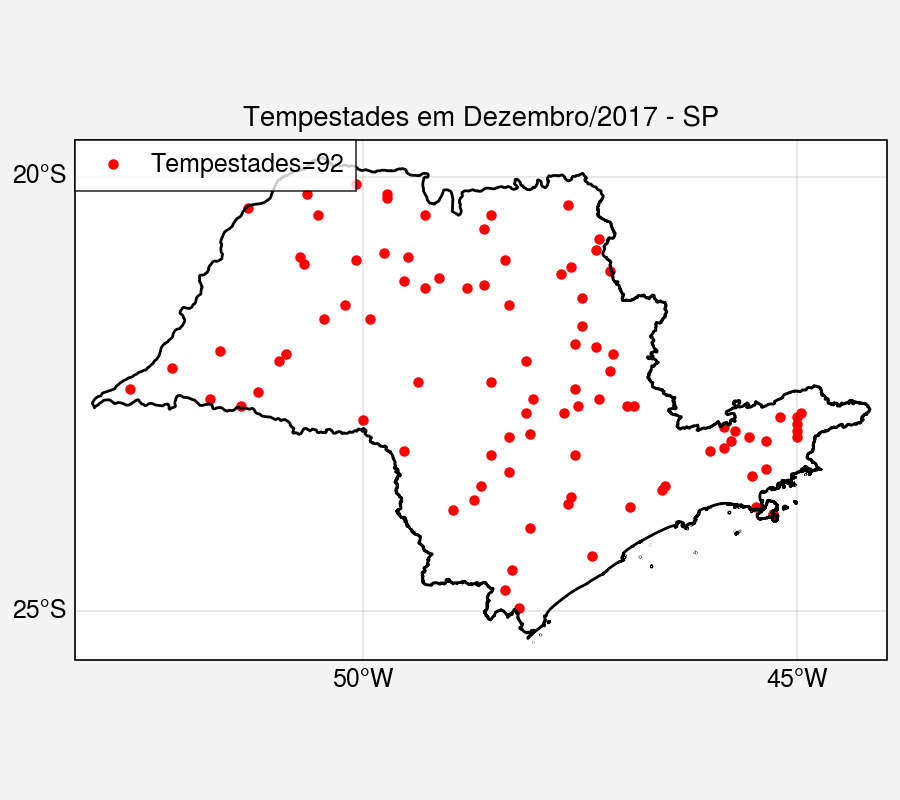

CPU times: user 2.66 s, sys: 98.5 ms, total: 2.76 s
Wall time: 3.58 s


In [60]:
%%time
# moldura da figura
fig, ax = uplt.subplots(figsize=(4.5,4), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(limites_estado['min_y'].values[0]-0.2, limites_estado['max_y'].values[0]+0.2),
          lonlim=(limites_estado['min_x'].values[0]-0.2, limites_estado['max_x'].values[0]+0.2),
          title=f'Tempestades em {nome_meses[int(mes-1)]}/{ano} - {estado}')

# plota localização das tempestades
ax.scatter(geo_df_storms['LONI'].values, geo_df_storms['LATI'].values, transform=ccrs.PlateCarree(), marker='o', s=10, color='red', label=f'Tempestades={str(geo_df_storms.shape[0])}')

# plota contorno do Estado
shapefile = list(shpreader.Reader(f'https://github.com/evmpython/shapefile/raw/refs/heads/main/UFs/{estado}/{estado}_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# adiciona legenda
ax.legend(ncol=1, loc='ul')

# salva figura
fig.save(f'{dir}/output/Fig_3_espacial_mensal_{estado}_{nome_meses[int(mes-1)]}.png')

# exibe na tela
uplt.show()

# **PARTE 6:** Plotando gráfico do horário de **nascimento** das tempestades

**Mostrando a tabela**

In [61]:
df

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**Mostrando a coluna hora de nascimento (HOR_I) da tabela**

In [62]:
df['HOR_I']

,HOR_I
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
92091,23.0
92092,23.0
92093,23.0
92094,23.0


**Calculando estatísticas básicas da coluna duração**

In [63]:
df['HOR_I'].describe()

,HOR_I
count,92096.000000
mean,13.083891
std,7.052202
min,0.000000
25%,7.000000
50%,16.000000
75%,19.000000
max,23.000000


**Agrupando os dados de tempestade por hora para a coluna do ano e atribuindo o valor para variável `por_hora`**

In [64]:
por_hora = df.groupby('HOR_I').count()['ANO_I']
por_hora

,ANO_I
HOR_I,
0.0,3394
1.0,2821
2.0,2718
3.0,3726
4.0,2905
5.0,2740
6.0,4144
7.0,3382
8.0,3119


**Gerando a Figura**

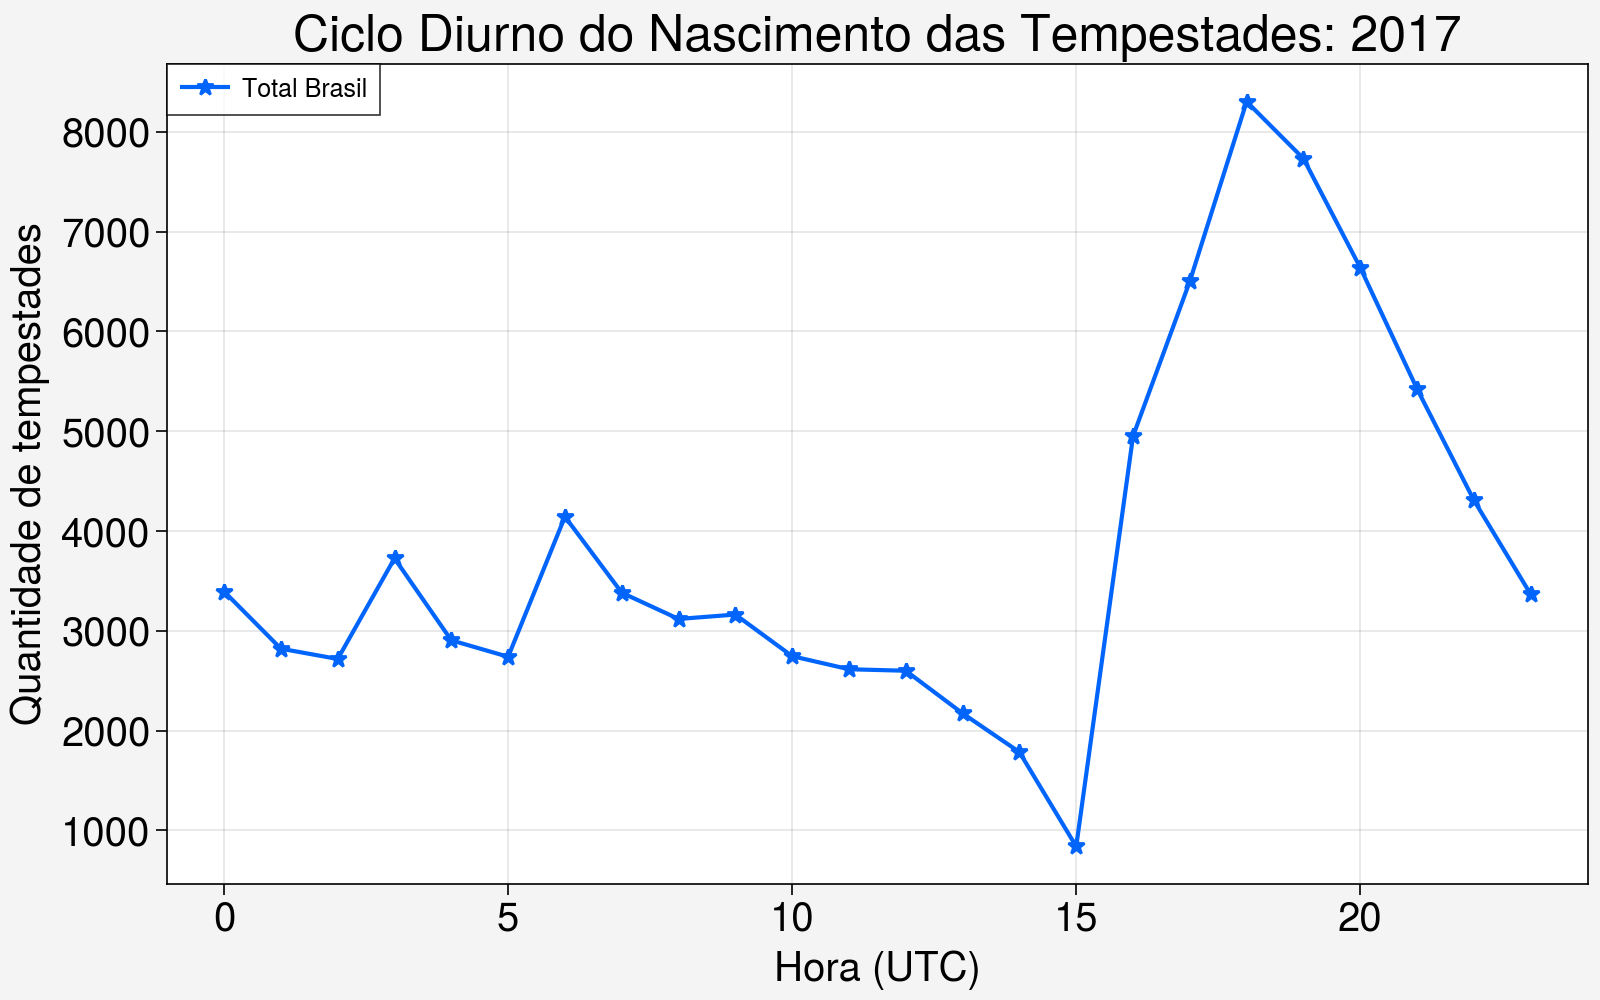

CPU times: user 570 ms, sys: 38.6 ms, total: 609 ms
Wall time: 615 ms


In [70]:
%%time
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(por_hora.index, por_hora.values, color='bright blue', marker='*', label='Total Brasil')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)', ylabel='Quantidade de tempestades',
          title=f'Ciclo Diurno do Nascimento das Tempestades: {ano}',
          xtickminor=False, ytickminor=False,
          small='20px', large='25px',
          xlim=(-1, 24))

# adiona a legenda
ax.legend(loc='ul')

# salva figura
fig.save(f'{dir}/output/Fig_4_nascimento.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

# **PARTE 7:** Plotando gráfico do horário de **dissipação** das tempestades

**Mostrando a tabela**

In [71]:
df

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**Mostrando a coluna hora de nascimento (HOR_F) da tabela**

In [72]:
df['HOR_F']

,HOR_F
0,1.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
92091,23.0
92092,23.0
92093,23.0
92094,23.0


**Calculando estatísticas básicas da coluna duração**

In [73]:
df['HOR_F'].describe()

,HOR_F
count,92096.000000
mean,13.070633
std,7.325960
min,0.000000
25%,7.000000
50%,14.000000
75%,20.000000
max,23.000000


**Agrupando os dados de tempestade por hora para a coluna do ano e atribuindo o valor para variável `por_hora`**

In [74]:
por_hora = df.groupby('HOR_F').count()['ANO_F']
por_hora

,ANO_F
HOR_F,
0.0,3933
1.0,3210
2.0,3022
3.0,3132
4.0,3135
5.0,3020
6.0,3150
7.0,3493
8.0,3457


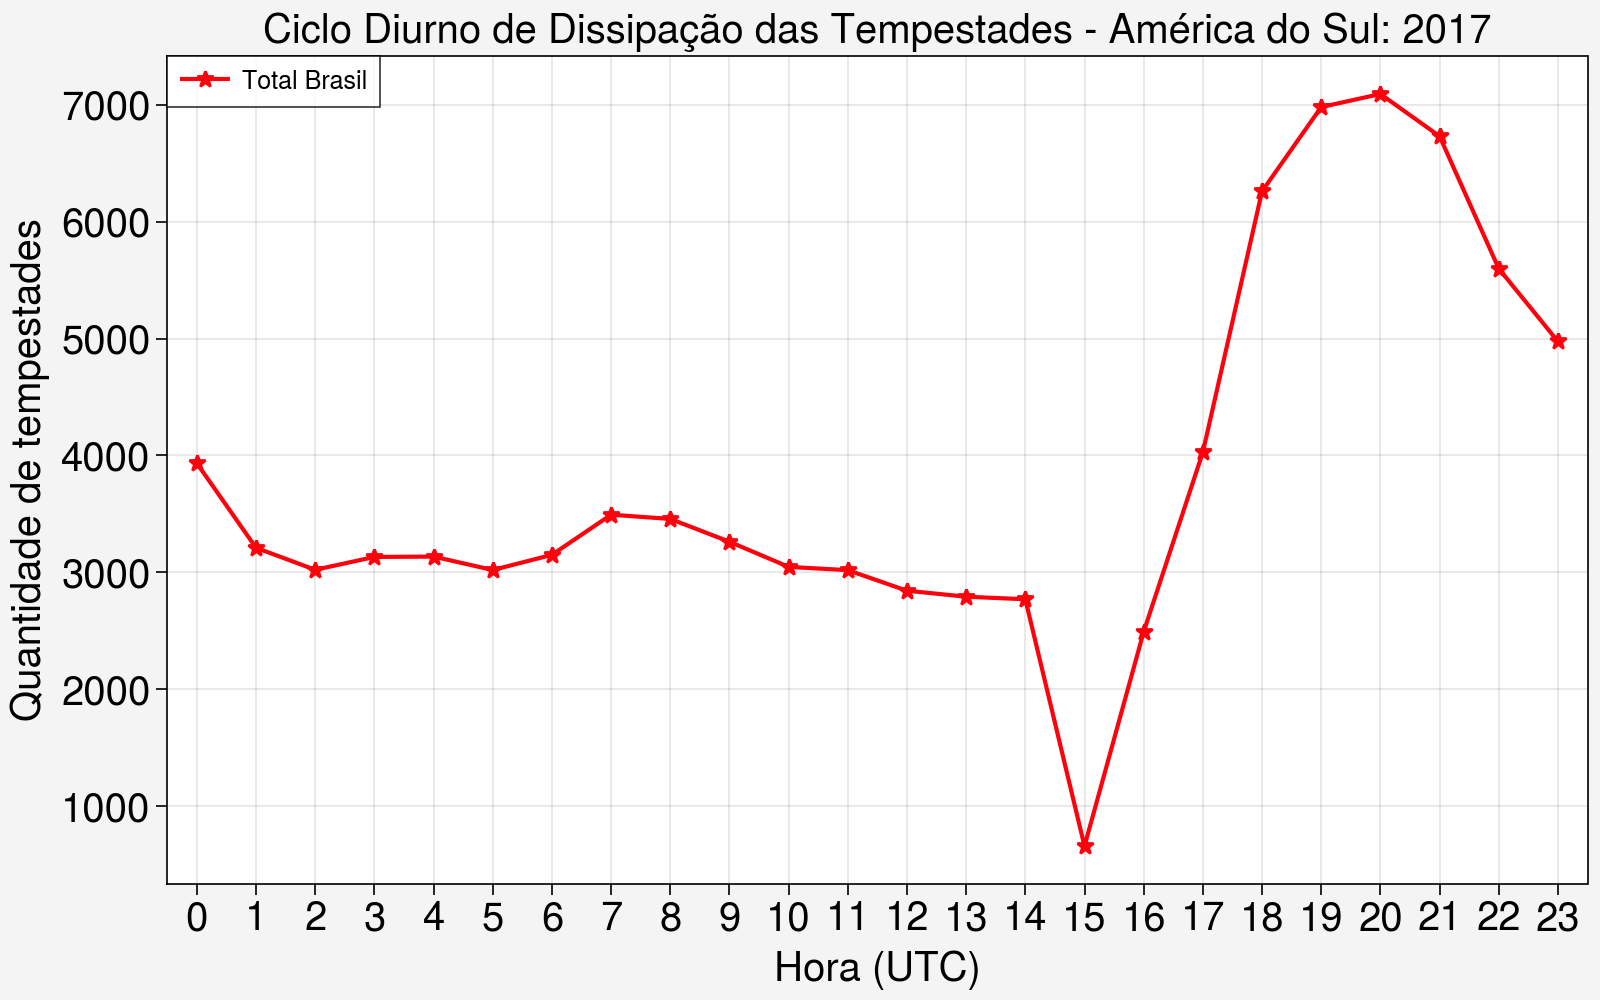

CPU times: user 1 s, sys: 45.2 ms, total: 1.05 s
Wall time: 1.33 s


In [79]:
%%time
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(8, 5), tight=True)

# plota gráfico de linha
ax.plot(por_hora.index, por_hora.values, color='bright red', marker='*', label='Total Brasil')

# define os ticks do eixo X, de 0 a 23
xticks = list(range(0, 24))

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)',
          ylabel='Quantidade de tempestades',
          title=f'Ciclo Diurno de Dissipação das Tempestades - América do Sul: {ano}',
          xtickminor=False,
          ytickminor=False,
          small='20px',
          large='20px',
          xlim=(-0.5, 23.5),  # adiciona espaço antes do 0 e depois do 23
          xticks=xticks)

# adiciona a legenda
ax.legend(loc='ul')

# salva figura
fig.save(f'{dir}/output/Fig_5_dissipação.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

In [80]:
xticks

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

# **PARTE 8:** Plotando gráfico da **duração** das tempestades

**Mostrando a tabela**

In [81]:
df

,ANO_I,MES_I,DIA_I,HOR_I,MIN_I,ANO_F,MES_F,DIA_F,HOR_F,MIN_F,DURACAO,IN,-CG,+CG,LATI,LONI,LATF,LONF
0,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,2,3,1,0.28,-80.00,0.32,-80.04
1,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,-1.92,-77.32,-1.92,-77.56
2,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,2.0,0.0,1.0,0,0,0,-4.56,-76.52,-4.48,-76.96
3,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,1.36,-76.40,1.28,-76.56
4,2017.0,1.0,1.0,1.0,0.0,2017.0,1.0,1.0,1.0,30.0,0.5,0,0,0,2.16,-76.12,2.16,-76.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92091,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-36.12,-67.40,-36.12,-67.36
92092,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,5,0,-7.08,-52.80,-7.04,-52.96
92093,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,2,0,0,-8.52,-48.88,-8.36,-49.04
92094,2017.0,12.0,31.0,23.0,0.0,2017.0,12.0,31.0,23.0,30.0,0.5,0,0,0,-22.16,-33.12,-22.04,-32.88


**Mostrando a coluna duração da tabela**

In [82]:
df['DURACAO']

,DURACAO
0,0.5
1,0.5
2,1.0
3,0.5
4,0.5
...,...
92091,0.5
92092,0.5
92093,0.5
92094,0.5


**Calculando estatísticas básicas da coluna duração**

In [83]:
df['DURACAO'].describe()

,DURACAO
count,92096.000000
mean,1.511428
std,1.345277
min,0.500000
25%,0.500000
50%,1.000000
75%,2.000000
max,18.000000


**Extraindo os valores únicos da coluna duração**

In [84]:
df['DURACAO'].unique()

array([ 0.5,  1. ,  4. ,  2.5,  1.5,  2. ,  3. ,  3.5,  7.5,  6.5,  5. ,
        4.5,  8. ,  6. ,  8.5,  5.5,  7. , 13.5, 13. , 10. , 10.5,  9. ,
        9.5, 11.5, 14.5, 11. , 14. , 12. , 12.5, 18. , 16.5, 15.5, 16. ])

**Contando a quantidade de eventos de cada valor único**

In [85]:
df['DURACAO'].value_counts()

,count
DURACAO,
0.5,33537
1.0,19280
1.5,12481
2.0,8348
2.5,5693
3.0,3896
3.5,2669
4.0,1853
4.5,1252


**Gerando a Figura**

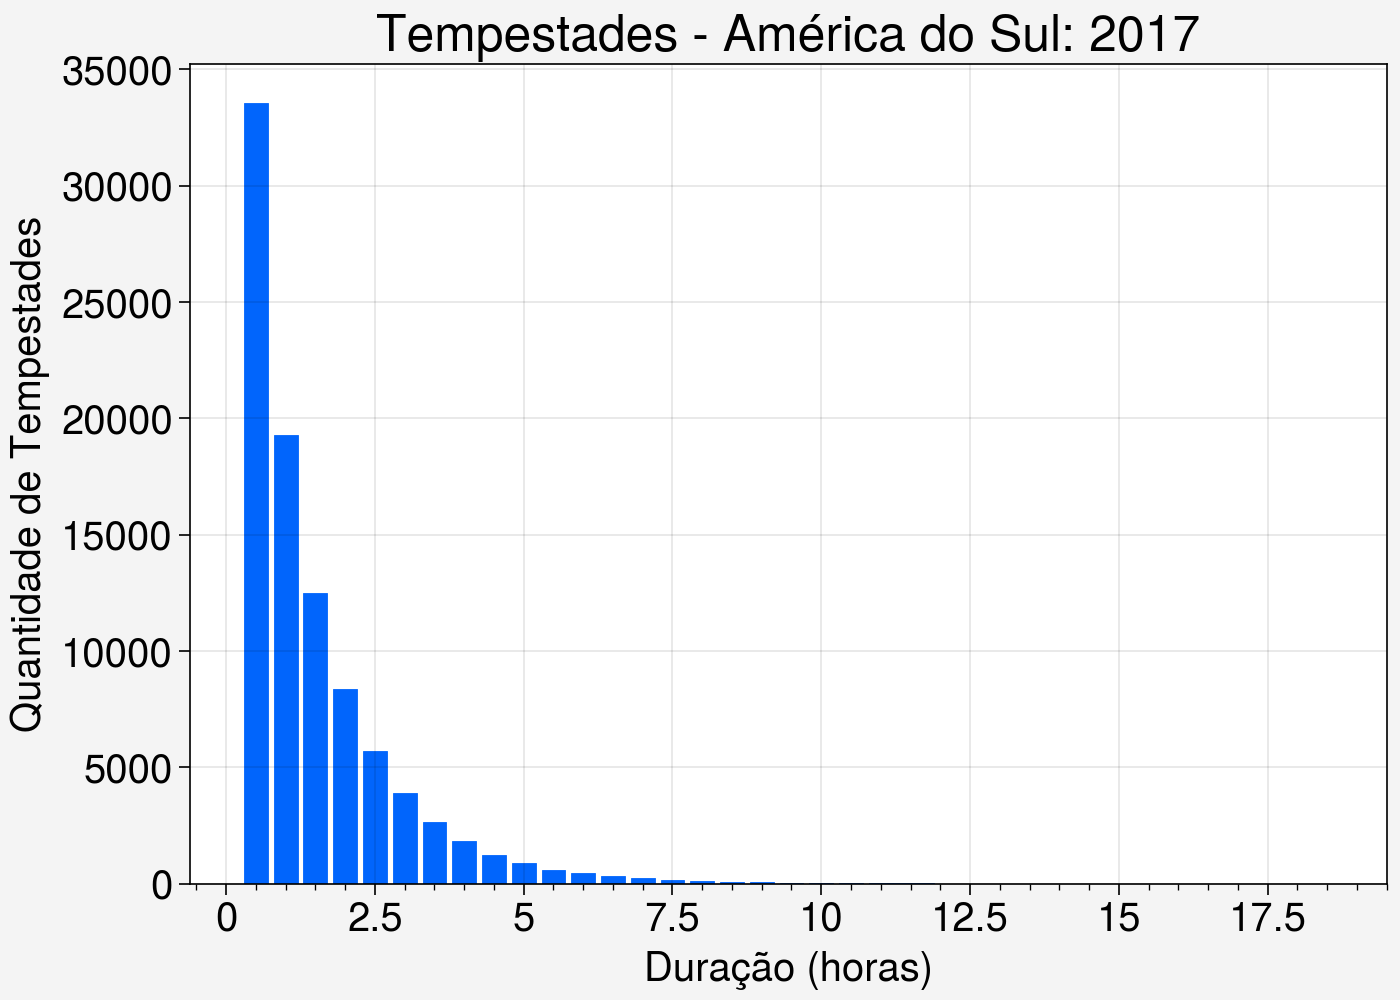

CPU times: user 609 ms, sys: 25 ms, total: 634 ms
Wall time: 929 ms


In [86]:
%%time
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(7, 5), tight=True)

# plota gráfico de barras
ax.bar(df['DURACAO'].value_counts(), color='bright blue')

# formato dos eixos
ax.format(title=f'Tempestades - América do Sul: {ano}',
          xlabel='Duração (horas)',
          ylabel='Quantidade de Tempestades',
          small='20px', large='25px',
          ytickminor=False)

# salva figura
fig.save(f'{dir}/output/Fig_6_duracao.jpg', dpi=300)

# exibe figura na tela
uplt.show()